In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import linprog

In [92]:
import matplotlib.ticker as tkr

def func1(x, pos):
    x += 0.0001
    s = str(x)
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:ind+4]

def func2(x, pos):
    x += 0.0001
    s = str(x)
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:ind+3]

y_format1 = tkr.FuncFormatter(func1)
y_format2 = tkr.FuncFormatter(func2)

In [3]:
data_path = "./data/synthetic_data.txt"
data = np.loadtxt(data_path)[:, 3]
data /= data.max()

In [4]:
n = data.size
fq = 1./1.
t = np.linspace(0.0, n*fq, n, endpoint=False)

n_f = n//2
data_f = fft(data)
t_f = fftfreq(n, fq)[:n_f]
data_f_norm = 2.0/n * np.abs(data_f[0:n_f])

In [6]:
crs = np.arange(2, 12, 2)
record_crs = [2, 10]
l2s = []
records = []
for cr in crs:
    print("cr ", cr)
    m = n_f // cr
    a_mat = np.random.normal(0, 1/cr, size=(m, n_f))
    y_f = a_mat.dot(data_f_norm)

    c_arr = np.ones(n_f)
    res = linprog(c_arr, A_eq=a_mat, b_eq=y_f)['x']
    data_rec = np.array(res)
    l2s.append(np.linalg.norm(data_f_norm - data_rec, ord=2))
    if cr in record_crs:
        records.append(data_rec)

cr  2
cr  4
cr  6
cr  8
cr  10


In [30]:
freqs = np.arange(n_f)

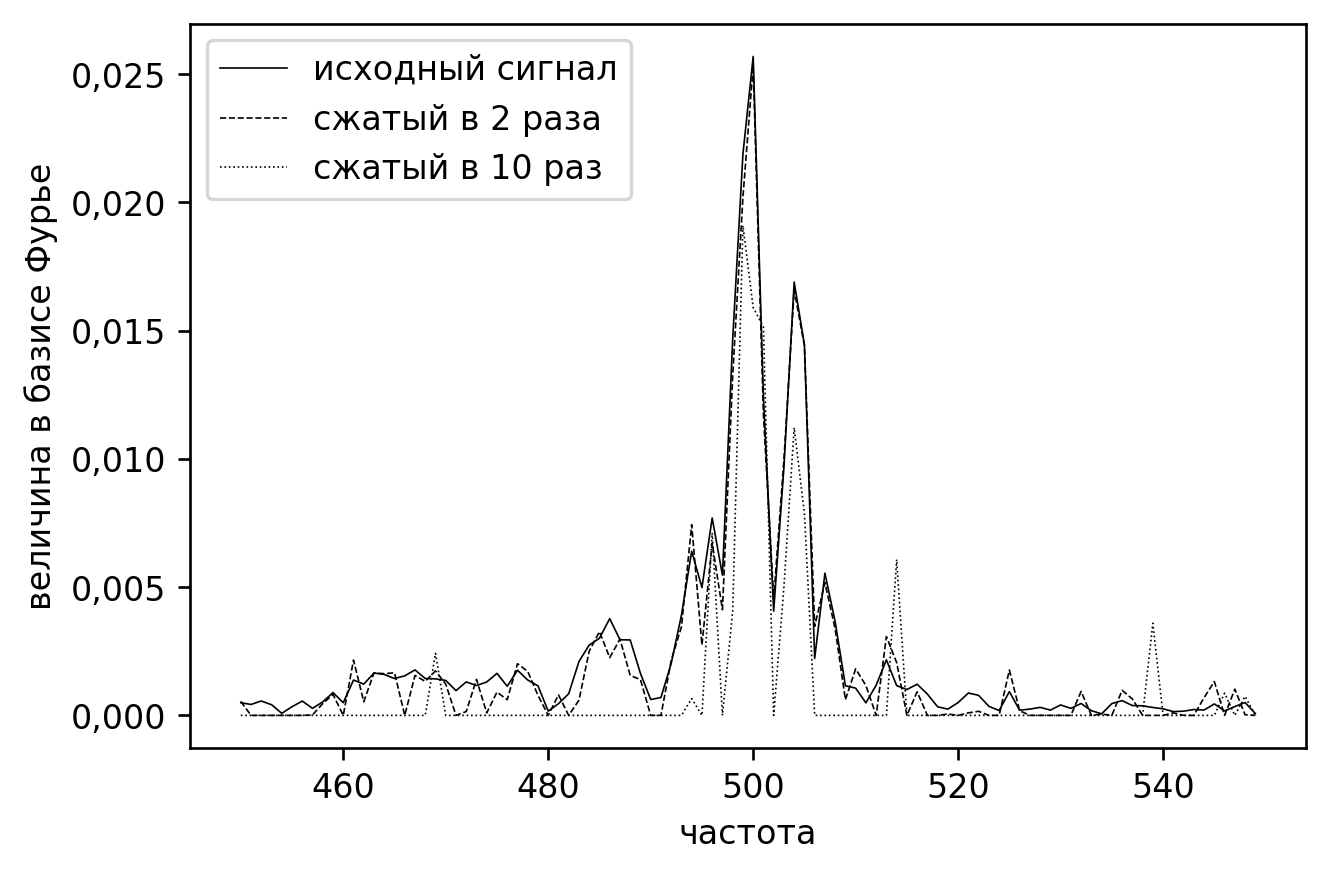

In [93]:
fig, ax = plt.subplots(dpi=240)
slc = slice(450, 550)
ax.plot(freqs[slc], data_f_norm[slc], "k", linewidth=.5, label="исходный сигнал")
ax.plot(freqs[slc], records[0][slc], "k--", linewidth=.5, label="сжатый в 2 раза")
ax.plot(freqs[slc], records[1][slc], "k:", linewidth=.5, label="сжатый в 10 раз")
plt.xlabel("частота")
plt.ylabel("величина в базисе Фурье")
plt.legend(loc='upper left')
plt.savefig("./compress_compare.png")
ax.yaxis.set_major_formatter(y_format1)
plt.show()

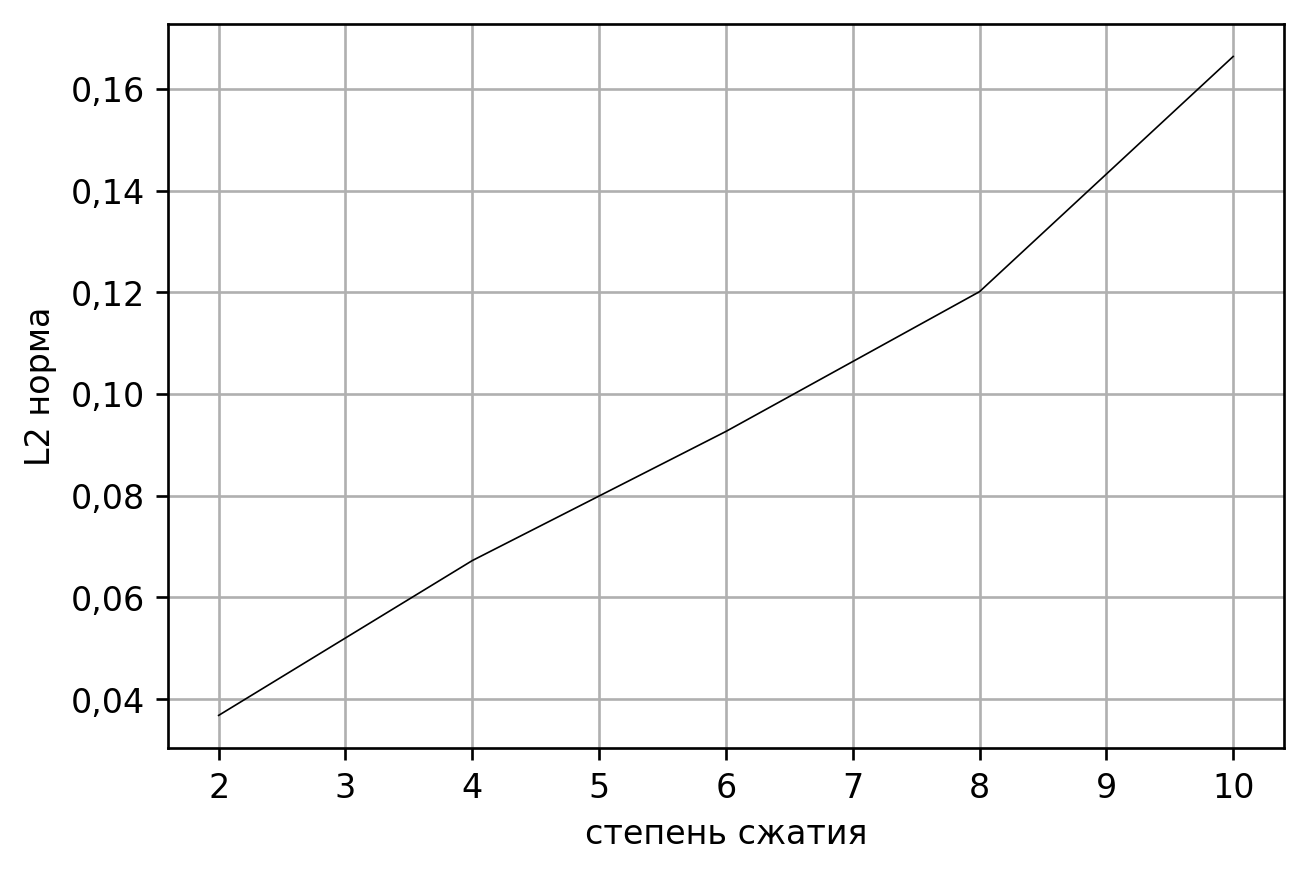

In [94]:
fig, ax = plt.subplots(dpi=240)
ax.plot(crs, l2s, "k", linewidth=.5)
plt.grid()
plt.xlabel("степень сжатия")
plt.ylabel("L2 норма")
plt.savefig("l2.png")
ax.yaxis.set_major_formatter(y_format2)
plt.show()